# Manipulating Data with Pandas

## Learning Objectives
After studying this notebook, completing the activities, and asking questions in class, you should be able to:

* Import and analyze data using Pandas
 * Read data from a text file
 * Loop over columns in Pandas array
 * Compute descriptive statistics with Pandas
 * Plot data stored in a Pandas dataframe

## Working with Data Using Pandas

[The publisher](http://highered.mheducation.com/sites/0073401331/student_view0/data_sets.html) contains all of the data for the examples and tables in our textbook. We'll use many of these datasets to illustrate key concepts in class.

Let's start with Tables 1.1 and 1.2 (pg. 21), which give **particulate matter (PM) emissions in g/gal** for 138 and 62 vehicles at low and high altitudes, respectively. Please take a moment to find those tables on the [website.](https://semmedia.mhhe.com/engineering/navidi_4e/navidi_4e_datasets.html#Ch1)

Now let's load the data into Python. In this class, we will use `Pandas`, which is a super popular and easy to use package/library/module for organizing and manipulating data. Here is a highly recommended [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) getting started tutorial.

In [1]:
# load the Pandas library, give nickname 'pd'
import pandas as pd

# load numpy, give nickname 'np'
import numpy as np

# load matplotlib, give nickname 'plt'
import matplotlib.pyplot as plt

### Loading and Inspecting Data

The code below reads in the first text file.

In [2]:
low = pd.read_csv('../data/table1-1.csv')

This creates a Pandas **dataframe**, which is stored in the variable `low`. We can easily print its contents to the screen.

In [3]:
print(low)

       PM
0    1.50
1    0.87
2    1.12
3    1.25
4    3.46
..    ...
133  4.63
134  2.80
135  2.16
136  2.97
137  3.90

[138 rows x 1 columns]


In [4]:
len(low)

138

The first row (vehicle) is numbered 0, which is perhaps not a surprise. We see there are 138 rows in the dataset, which matches what we expect: data for 138 vehicles at low altitude.

The output above is ugly. We can use the `.head()` and `.tail()` commands to look at only the first and last five entries.

In [9]:
low.head()

,PM
0,1.50
1,0.87
2,1.12
3,1.25
4,3.46


In [10]:
low.tail()

,PM
133,4.63
134,2.80
135,2.16
136,2.97
137,3.90


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Load the high altitude data, which is stored in <tt>table1-2.csv</tt> into the Pandas dataframe <tt>high</tt>. Verify there are 62 rows. Use the head command to see the first few rows.
</div>

In [11]:
### BEGIN SOLUTION
high = pd.read_csv('../data/table1-2.csv')

print("Number of rows = ",len(high))

high.head()

### END SOLUTION

Number of rows =  62


,PM
0,7.59
1,6.28
2,6.07
3,5.23
4,5.54


In [13]:
### BEGIN HIDDEN TESTS

assert len(high) == 62, "There should be 62 rows."

### END HIDDEN TESTS

### Computing Summary Statistics

Our example so far has only one column of data, named `PM`. We can access this column two ways:

In [14]:
low['PM']

0      1.50
1      0.87
2      1.12
3      1.25
4      3.46
       ... 
133    4.63
134    2.80
135    2.16
136    2.97
137    3.90
Name: PM, Length: 138, dtype: float64

In [15]:
low.PM

0      1.50
1      0.87
2      1.12
3      1.25
4      3.46
       ... 
133    4.63
134    2.80
135    2.16
136    2.97
137    3.90
Name: PM, Length: 138, dtype: float64

Pandas also makes it extremely easy to compute summary statistics and perform exploratory data analysis.

In [16]:
low.PM.describe()

count    138.000000
mean       3.714565
std        2.558040
min        0.250000
25%        1.472500
50%        3.180000
75%        5.265000
max       11.230000
Name: PM, dtype: float64

We will mathematically define the mean (a.k.a. average), standard deviation (std), minimum (min), maximum (max), and 25%-, 50%-, and 75%-ile (percentile) later this semester. The 50%-ile is also know as the median. Half of the observations are above the median and half are below.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Compute the mean (average) and median (50%-ile) for high altitude data. Store the results in Python variables <tt>high_average</tt> and <tt>high_median</tt>.
</div>

In [17]:
### BEGIN SOLUTION
print(high['PM'].describe())

high_average = 6.596452
high_median = 5.750000
### END SOLUTION

count    62.000000
mean      6.596452
std       4.518998
min       1.110000
25%       3.487500
50%       5.750000
75%       7.755000
max      23.380000
Name: PM, dtype: float64


In [18]:
### BEGIN HIDDEN TESTS
ans_average = 6.596452
ans_median = 5.750000

assert np.abs(high_average - ans_average) < 1E-4, "Check the mean (average) calculation."
assert np.abs(high_median - ans_median) < 1E-4, "Check the median (50%-ile) calculation."
### END HIDDEN TESTS

### Combining Pandas and Matplotlib

Together, Pandas and Matplotlib make it easy to quickly visualize a dataset. The code below creates a histogram.

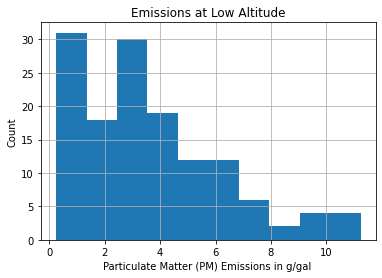

In [19]:
plt.hist(low.PM)
plt.xlabel("Particulate Matter (PM) Emissions in g/gal ")
plt.ylabel("Count")
plt.title("Emissions at Low Altitude")
plt.grid(True)
plt.show()

Each bin of the histogram shows the count (number) of vehicle with emissions between the left and right bound of the bin. For example, the third bin from the left shows that there are approximate 30 vehicles in the dataset with emissions between 2.2 and 3.8 g/gal.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Create a histogram for the high altitude data. Then determine the approximate number of vehicles with emissions between 0 and 3 g/gal. Store your answer in <tt>high_count</tt>. The upper limit of 3 g/gal is approximate. We want you to make a plot and interpret it.
</div>

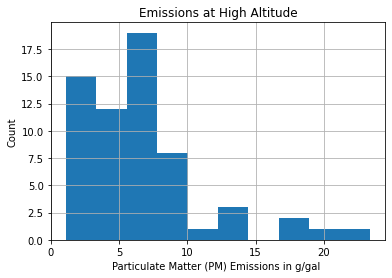

In [20]:
### BEGIN SOLUTION
plt.hist(high.PM)
plt.xlabel("Particulate Matter (PM) Emissions in g/gal ")
plt.ylabel("Count")
plt.title("Emissions at High Altitude")
plt.grid(True)
plt.show()

high_count = 15
### END SOLUTION

In [21]:
### BEGIN HIDDEN TESTS
assert np.abs(high_count - 15) < 1.1, "Check your plot again. The bounds on 0 to 3 are approximate."
### END HIDDEN TESTS

## Investment Strategies

We will spend one-third to one-half of Class 3 working on an example to leverage our new Python skills.

The CSV (Comma Seperated Value) file `Stock_Data.csv` is the historical daily adjusted closing prices for five index funds:

| Symbol | Name |
|-|-|
| GSPC | S&P 500 | 
| DJI | Dow Jones Industrial Average | 
| IXIC | NASDAQ Composite | 
| RUT | Russell 2000 |
| VIX | CBOE Volatility Index |

### Getting Started

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Load the data into a Pandas dataframe named <tt>stocks</tt>. Then inspect the first 5 rows.
</div>

In [22]:
### BEGIN SOLUTION
stocks = pd.read_csv('../data/Stock_Data.csv')
stocks.head()
### END SOLUTION

,DJI,GSPC,IXIC,RUT,VIX
0,14447.75000,1551.689941,3235.300049,945.849976,13.74
1,14559.65039,1563.770020,3252.479980,949.820007,12.77
2,14526.16016,1562.849976,3256.520020,950.239990,13.15
3,14578.54004,1569.189941,3267.520020,951.539978,12.70
4,14572.84961,1562.170044,3239.169922,938.789978,13.58


In [23]:
### BEGIN HIDDEN TESTS
assert len(stocks) == 1259, "The dataframe 'stocks' should have 1259 rows"

for c in ['DJI','GSPC','IXIC','RUT','VIX']:
    assert c in stocks.columns, "The dataframe should have a column named "+c
### END HIDDEN TESTS

We can loop over the column names of the dataframe:

In [24]:
for c in stocks.columns:
    print("The mean price of",c,"is",stocks[c].mean(),"dollars.")

The mean price of DJI is 18308.909006274782 dollars.
The mean price of GSPC is 2090.5075138498805 dollars.
The mean price of IXIC is 4998.311674695007 dollars.
The mean price of RUT is 1220.7430421429713 dollars.
The mean price of VIX is 14.550937264495646 dollars.


This is extremely powerful. Let's use a for loop to plot the price of each index fund relative to the first day on a single plot.

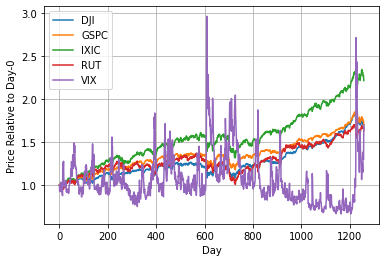

In [25]:
for c in stocks.columns:
    plt.plot(stocks[c] / stocks[c][0],label=c)

plt.xlabel("Day")
plt.ylabel("Price Relative to Day-0")
plt.grid(True)
plt.legend()
plt.show()

### Portfolio Calculator

We want to create a computer program (function) that does the following:
* Takes these historical prices, an initial investment amount, and daily investment amount as inputs.
* On the first day in the dataset, splits the initial investment amount evenly among each of the index funds. Computes and records the number of shares purchased. Also records the value of the portfolio.
* On the remain days, splits the daily investment amount evenly among each of the index funds. Computes and records the number of shares at the end of the day. Also records the value of the portfolio using the new prices.
* After considering each day, plots the value of the portolio versus time.
* Returns the portolio history which includes the number of shares and value for each day.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, write pseudocode for this computer program.
</div>

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, use your pseudocode to complete the function below.
</div>

In [26]:
def portfolio(stock_data,initial_investment,daily_investment):
    ''' Compute and plot portfolio value
    
    Assumptions:
        We invest evenly across all available index funds
    
    Arguments:
        stock_data: Pandas dataframe containing historical stock prices
        initial_investment: dollars invested at the start of our portfolio (float)
        daily_investment: dollars invested at the end of each day (float)
        
    Returns:
        portfolio: Pandas dataframe containing the number of shares of each fund 
            and the value of the portfolio
            
    Also:
        Creates a (well labeled) plot of portfolio value versus time
    
    '''
    
    # determine the numbers of stocks
    n = len(stock_data.columns)
    
    ### Create a dataframe to store the results
    
    # Extract the names of the columns of 'stock_data', convert to list
    c = stock_data.columns.values.tolist()
    
    # Add 'Value' to the list
    c.append("Value")
    
    # Create new dataframe with the name number of rows as 'stock_data',
    # the same columns as 'stock_data' plus 'Value', and filled with 0.0
    portfolio = pd.DataFrame(0.0, index=range(len(stock_data)), columns=c)
    
    ### BEGIN SOLUTION
    
    ### Determine the number of initial shares and value of the portfolio
    for s in stock_data.columns:
        portfolio[s][0] = initial_investment / stock_data[s][0] / n
        portfolio['Value'][0] = initial_investment
    
    ### loop over remaining days
    for i in range(1,len(stock_data)):
        
        # loop over stocks
        for s in stock_data.columns:
            
            # purchase new shares each day
            portfolio[s][i] = daily_investment / stock_data[s][i] / n + portfolio[s][i-1]
    
            # compute value
            portfolio["Value"][i] += portfolio[s][i]*stock_data[s][i]
    
    plt.plot(portfolio["Value"])
    plt.xlabel("Day")
    plt.ylabel("Portfolio Value (USD)")
    plt.grid(True)
    ### END SOLUTION
    
    return portfolio

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Which is better? a) Invest \$2000 on the first day and \$0 each subsequent day or b) Invest \$500 on the first day and \$1.5 each subsequent day?
</div>

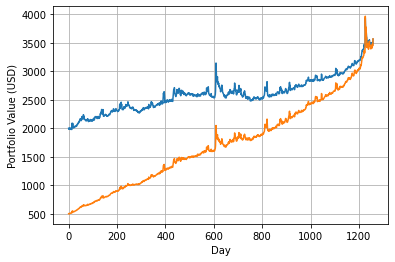

In [27]:
### BEGIN SOLUTION
p1 = portfolio(stocks, 2000.0, 0.0)
p2 = portfolio(stocks, 500.0, 1.5)
### END SOLUTION

**Discuss in a few sentences**: